# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Fionnuala Eastwood

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [4]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [6]:
# this means that train will use 80% of the data, and the test will use 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: We need to train_test splot before running dimesnion reduction algorithms so that we ensure that our models generalize to unseen data. If we dont do the split before running the algorithm our data might fail in ways like overfitting, where the model only works on a small, specific set of data.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, lengends, and etc) should be similar.

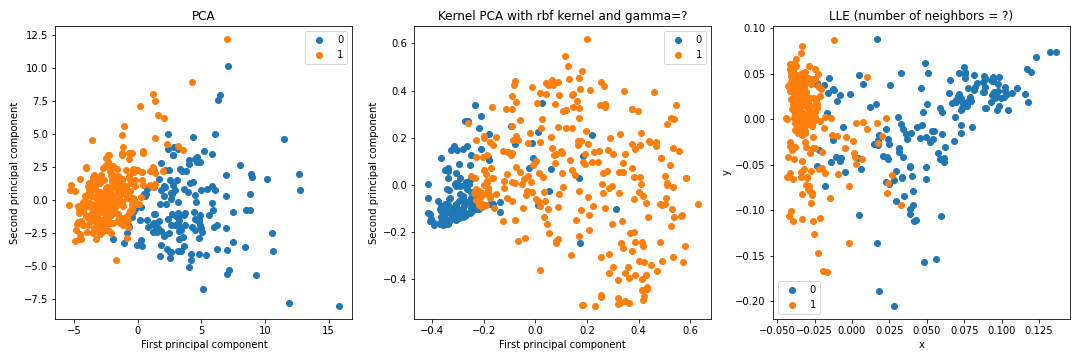

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





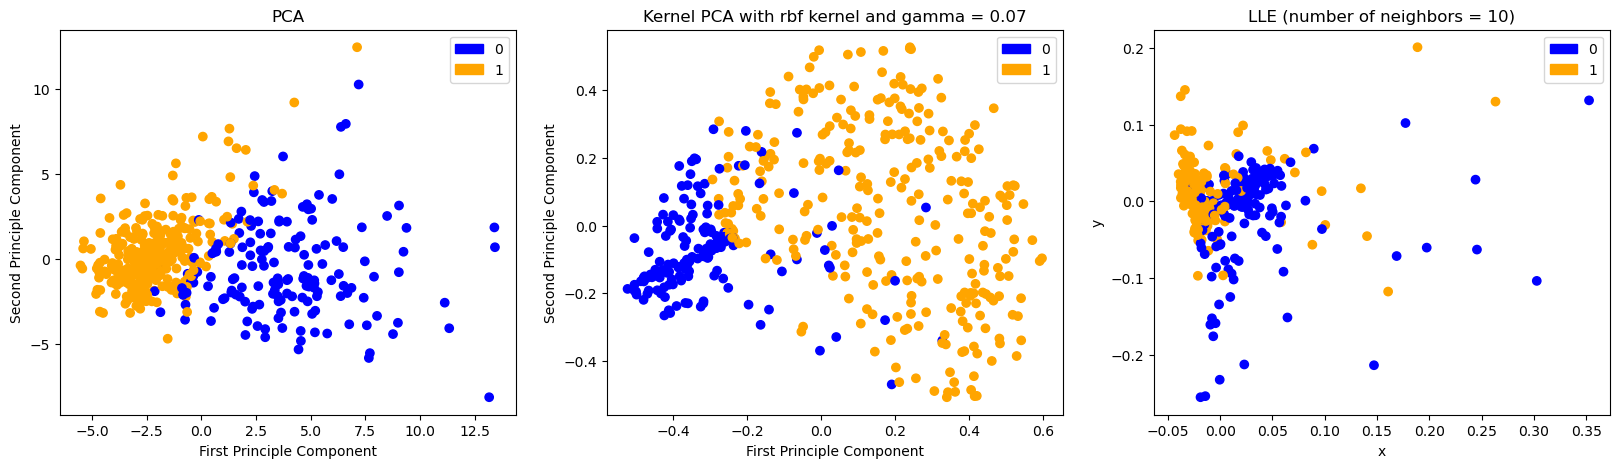

In [9]:
# PCA
def reg_PCA(X, x): #y
    """
    Inputs:
    X: X_train data
    x: X_test data
    Outputs:
    Returns the pca of each (fits to X_train and transforms both)
    """
    # standardize the data
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

    # do PCA
    pca = PCA(n_components=2, svd_solver='full')
    
    # fit the data to X_train and transform both X_train and X_test based on that fit
    X_reduced = pca.fit_transform(X_standard)
    x_reduced = pca.transform(x_standard)

    # return the two transformed dataframes
    return X_reduced, x_reduced

# Kernel PCA
def Kernel_PCA(X, x): #y
    """
    Inputs:
    X: x_train data
    x: X_test data
    Outputs:
    Returns kernel pca of each (fits to X_train and transforms both)
    """
    # standardize the data
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    
    # do kernel PCA
    rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.07)
    
    # fit the data to X_train and transform both X_train and X_test based on that fit
    X_reduced = rbf_pca.fit_transform(X_standard)
    x_reduced = rbf_pca.transform(x_standard)
    
    # return the two transformed dataframes
    return X_reduced, x_reduced

# LLE
def LLE(X, x): #y
    """
    Inputs:
    X: X_train data
    x: X_test data
    Outputs:
    Returns LLE of each (fits to X_train and transforms both)
    """
    # standardize the data
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    
    # do LLE
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
    
    # fit the data to X_train and transform both X_train and X_test based on that fit
    X_reduced = lle.fit_transform(X_standard)
    x_reduced = lle.transform(x_standard)

    # return the two transformed dataframes
    return X_reduced, x_reduced

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# set colormap
cmap = ListedColormap(['blue', 'orange'])

# Plotting PCA
X_train_pca, X_test_pca = reg_PCA(X_train, X_test) # run PCA function to take in X_train and X_test
axs[0].scatter(*X_train_pca.T, c=y_train, cmap=cmap, alpha=1) # create scatter plot for returned data (with target training data y_train)
# set title and labels
axs[0].set_title('PCA')
axs[0].set_xlabel('First Principle Component') # set x label
axs[0].set_ylabel('Second Principle Component') # set y label

# Plotting Kernel PCA
X_train_kernel_pca, X_test_kernel_pca = Kernel_PCA(X_train, X_test) # run Kernel_PCA function to take in X_train and X_test
axs[1].scatter(*X_train_kernel_pca.T, c=y_train, cmap=cmap, alpha=1) # create scatter plot for returned data (with target training data y_train)
# set title and labels
axs[1].set_title('Kernel PCA with rbf kernel and gamma = 0.07')
axs[1].set_xlabel('First Principle Component') # set x label
axs[1].set_ylabel('Second Principle Component') # set y label

# Plotting LLE
X_train_lle, X_test_lle = LLE(X_train, X_test) # run LLE function to take in X_train and X_test
axs[2].scatter(*X_train_lle.T, c=y_train, cmap=cmap, alpha=1) # create scatter plot for returned data (with target training data y_train)
# set title and labels
axs[2].set_title('LLE (number of neighbors = 10)')
axs[2].set_xlabel('x') # set x label
axs[2].set_ylabel('y') # set y label

# Create legend
legend_labels = ['0', '1'] # name of labels
legend_handles = [mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(legend_labels)] # set a color to each label
axs[0].legend(handles=legend_handles) # set legend for each subplot
axs[1].legend(handles=legend_handles) # set legend for each subplot
axs[2].legend(handles=legend_handles) # set legend for each subplot

plt.show() # show the plots


## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

I will use PCA because according to the data and the visualizations, the PCA does the best at seperating the data and defining them into different classes, or categories. This is important as we are creating classification models, so we want to use the dimension reduction tecnique best at doing this. We wouldnt use the other two tecniques because when looking at the projections, the different colored data points are still intermingling (at least more than the PCA projection). These do not demonstrate as adequet categorization and clustering, so we will not be using these tecniques.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [13]:
#### Your code here

# bring in reduced data from PCA function we already ran above
X_train_ = X_train_pca
X_test_ = X_test_pca

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [15]:
# Your function here
def plot_regions(c, X, y, title):
    """
    Inputs:
    c: classification model used
    X: X_train_ data
    y: y_train data
    Outputs:
    Outputs a decision region plot based on data inputted, and type of classificaiton model being used
    """
    
    # for convenience, give names to the two data's (to coordinate with labels 0 and 1)
    x0 = X[:,0]
    x1 = X[:,1]
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions
    XX = xx.ravel() # converts multidimensional array into a 1d array
    YY = yy.ravel() # converts multidimensional array into a 1d array
    XY = np.c_[XX, YY] # join together the two parts of the grid. 
    
    p = c.predict(XY) # predict
    p = p.reshape(xx.shape) # turn predictions p back into 2d
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, levels=[-0.5, 0.5, 1.5], vmin=0, vmax=1)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 1)
    
    # set tile
    ax.set_title(f'Decision Region for {title}')
    
    # set labels
    ax.set(xlabel = "First Component", 
           ylabel = "Second Component")


#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

Test accuracy for 2 nearest neighbors is 0.96
Test accuracy for 4 nearest neighbors is 0.96
Test accuracy for 6 nearest neighbors is 0.96
Test accuracy for 8 nearest neighbors is 0.97
Test accuracy for 10 nearest neighbors is 0.96
Test accuracy for 12 nearest neighbors is 0.96
Test accuracy for 14 nearest neighbors is 0.96
Test accuracy for 16 nearest neighbors is 0.95
Test accuracy for 18 nearest neighbors is 0.95
Test accuracy for 20 nearest neighbors is 0.94

Highest accuracy: 0.97, n_neighbors: 8


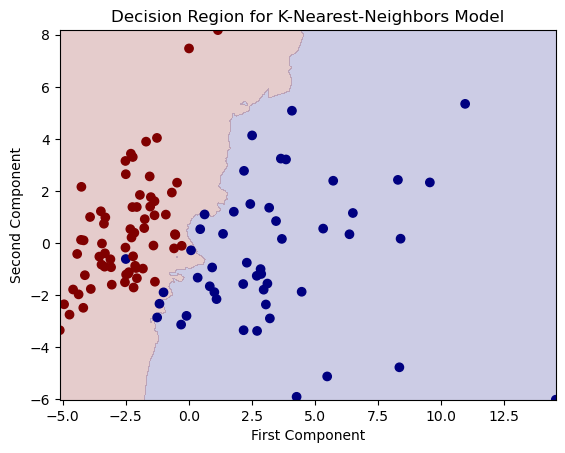

In [17]:
# K Nearest Neighbors Model

accuracy_neigh = {} # create dictionary to hold the accuracy for each nearest neighbors

# for loop to cycle through possible number of nearest neighbors
for i in range (2,21,2):
    
    # train model and fit data based on current iterations number of nearest neighbors
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train_, y_train)

    # calculate test accuracy and print 
    y_pred_neigh = neigh.predict(X_test_)
    acc_neigh = neigh.score(X_test_, y_test)
    print(f'Test accuracy for {i} nearest neighbors is {acc_neigh:.2f}')
    
    # append accuracy to dictionary with index (number of nearest neighbors)
    accuracy_neigh[i] = acc_neigh

max_accuracy_neigh = max(accuracy_neigh.values()) # find the highest accuracy
accuracy_index_neighbors = max(accuracy_neigh, key=accuracy_neigh.get) # find the highest accuracy's index (number of nearest neighbor)
print(f"\nHighest accuracy: {max_accuracy_neigh:.2f}, n_neighbors: {accuracy_index_neighbors}") # print

# train and fit model based on the highest accuracy
neighbors = KNeighborsClassifier(n_neighbors=accuracy_index_neighbors).fit(X_train_, y_train)

# plot the decision region
plot_regions(neighbors, X_test_, y_test, 'K-Nearest-Neighbors Model')


#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

Test accuracy is 0.93


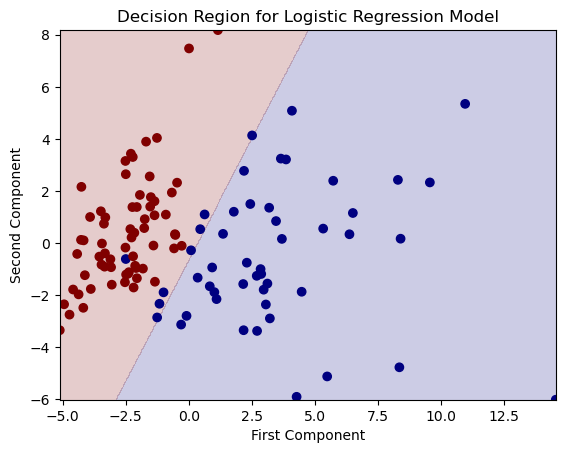

In [19]:
# train the model - fit data
Log = LogisticRegression().fit(X_train_, y_train)

# calculate test accuracy
y_pred_log = Log.predict(X_test_)
acc_log = Log.score(X_test_, y_test)
print(f'Test accuracy is {acc_log:.2f}')

# draw decision region
plot_regions(Log, X_test_, y_test,'Logistic Regression Model')

#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

Test accuracy for a max_depth of 2 is 0.92
Test accuracy for a max_depth of 4 is 0.94
Test accuracy for a max_depth of 6 is 0.90
Test accuracy for a max_depth of 8 is 0.91
Test accuracy for a max_depth of 10 is 0.90
Test accuracy for a max_depth of 12 is 0.91
Test accuracy for a max_depth of 14 is 0.90
Test accuracy for a max_depth of 16 is 0.93
Test accuracy for a max_depth of 18 is 0.92
Test accuracy for a max_depth of 20 is 0.93

Highest accuracy: 0.94, max_depth: 4


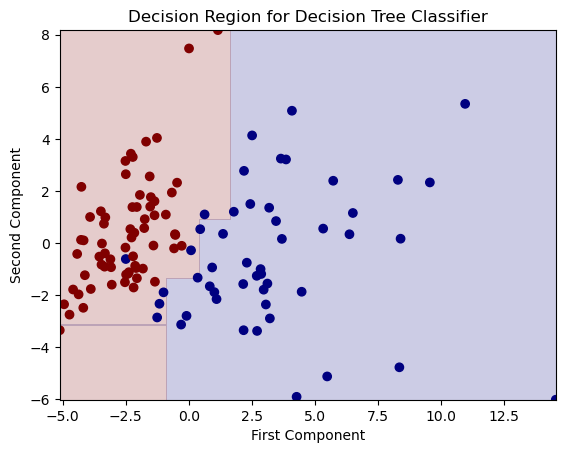

In [21]:
accuracy_tree = {}  # create dictionary to hold the accuracy for each nearest neighbors

# for loop to cycle through possible max_depths
for j in range (2,21,2):
    
    # train the model - fit data
    Tree = DecisionTreeClassifier(max_depth=j).fit(X_train_, y_train)

    # calculate test accuracy and print 
    y_pred_tree = Tree.predict(X_test_)
    acc_tree = Tree.score(X_test_, y_test)
    print(f'Test accuracy for a max_depth of {j} is {acc_tree:.2f}')
    
    # append accuracy to dictionary with index (current max_depth)
    accuracy_tree[j] = acc_tree

max_accuracy_tree = max(accuracy_tree.values()) # find highest accuracy
max_index_tree = max(accuracy_tree, key=accuracy_tree.get) # find the highest accuracy's index (the corresponding max_depth)
print(f"\nHighest accuracy: {max_accuracy_tree:.2f}, max_depth: {max_index_tree}") # print

# train the model and fit data
Tree = DecisionTreeClassifier(max_depth=max_index_tree).fit(X_train_, y_train)

# draw decision region
plot_regions(Tree, X_test_, y_test, 'Decision Tree Classifier')

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

Test accuracy for 92 n_estimators and a max_depth of 2 is 0.91
Test accuracy for 94 n_estimators and a max_depth of 4 is 0.93
Test accuracy for 96 n_estimators and a max_depth of 6 is 0.95
Test accuracy for 98 n_estimators and a max_depth of 8 is 0.93
Test accuracy for 100 n_estimators and a max_depth of 10 is 0.94
Test accuracy for 102 n_estimators and a max_depth of 12 is 0.94
Test accuracy for 104 n_estimators and a max_depth of 14 is 0.93
Test accuracy for 106 n_estimators and a max_depth of 16 is 0.93
Test accuracy for 108 n_estimators and a max_depth of 18 is 0.94
Test accuracy for 110 n_estimators and a max_depth of 20 is 0.94

Highest accuracy: 0.95, max_depth: 6, n_estimators: 96


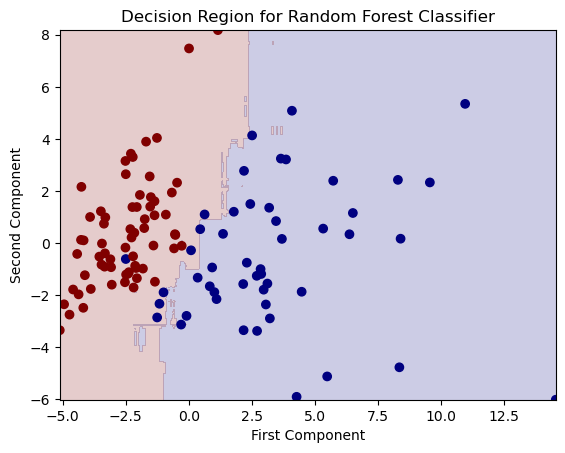

In [23]:
accuracy_rf = {}  # create dictionary to hold the accuracy for each nearest neighbors

# for loop to cycle through possible max_depths
for g in range (2,21,2):
    
    # create a variable for current n_estimators based on the iterations for max_depth
    g_ = g+90
    
    # train the model and fit the data
    rf = RandomForestClassifier(n_estimators=g_, max_depth=g).fit(X_train_, y_train)

    # compute test accuracy and print
    y_pred_rf = rf.predict(X_test_)
    acc_rf = rf.score(X_test_, y_test)
    print(f'Test accuracy for {g_} n_estimators and a max_depth of {g} is {acc_rf:.2f}')
    
    # append the test accuracy for current iteration with an index (current max_depth)
    accuracy_rf[g] = acc_rf

max_accuracy_rf = max(accuracy_rf.values()) # find highest accuracy
max_index_rf = max(accuracy_rf, key=accuracy_rf.get) # find index for highest accuracy (max depth)
print(f"\nHighest accuracy: {max_accuracy_rf:.2f}, max_depth: {max_index_rf}, n_estimators: {max_index_rf + 90}") # print

# train random feature model - fit data
rf = RandomForestClassifier(n_estimators=max_index_rf + 90, max_depth=max_index_rf).fit(X_train_, y_train)

# draw decision region
plot_regions(rf, X_test_, y_test, 'Random Forest Classifier')

#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

KNeighborsClassifier 0.9736842105263158
LogisticRegression 0.9298245614035088
DecisionTreeClassifier 0.9385964912280702
VotingClassifier 0.9473684210526315


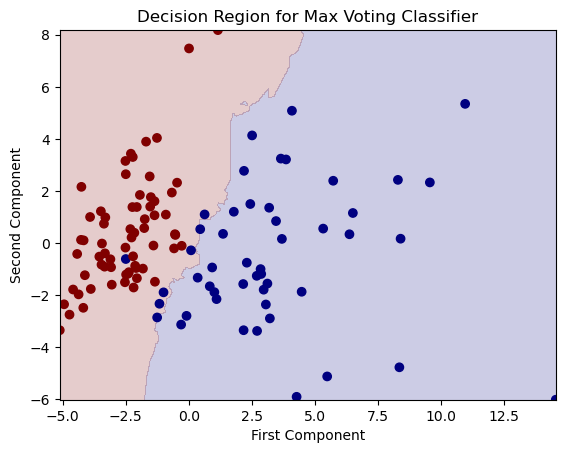

In [25]:
# define classifiers you want to use (single models you want to use), and use the models ran before - as they hold the selected hyperparameters 
kn_clf = neighbors
log_clf = Log
tree_clf = Tree

# define max vote classifier - uses estimators which are all the models you want to use
voting_clf = VotingClassifier( estimators=[('kn',kn_clf),('lr',log_clf),('tree',tree_clf)], voting='hard')

# train max vote classifier - fit data
voting_clf.fit(X_train_, y_train)

# look at and print each classifier's accuracy on the test set:
for clf in (kn_clf, log_clf, tree_clf, voting_clf):
    clf.fit(X_train_, y_train) # fit and train 
    acc_vc = clf.score(X_test_, y_test) # calculate accuracy
    print(clf.__class__.__name__, acc_vc) # print

# draw decision region
plot_regions(voting_clf, X_test_, y_test, "Max Voting Classifier")